<a href="https://colab.research.google.com/github/tejasmanchi/NLP/blob/main/Cyber_bullying(Poor%20cm%20Score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/DS/cyberbullying_tweets.csv')
df.dropna(inplace=True)

In [4]:
df.columns=['tweets','bullytype']
df.head()

,tweets,bullytype
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [6]:
df['bullytype'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [7]:
df1=df[(df['bullytype']=='not_cyberbullying') | (df['bullytype']=='religion') | (df['bullytype']=='ethnicity')]
df=df[(df['bullytype']=='not_cyberbullying') | (df['bullytype']=='religion')]
# df = df[df['bullytype'].isin(['not_cyberbullying', 'religion', 'ethnicity'])] another method

In [ ]:
#!pip install category_encoders

In [8]:
df['bullytype'].value_counts()

religion             7998
not_cyberbullying    7945
Name: bullytype, dtype: int64

In [9]:
df['bullytype']=df['bullytype'].replace({'not_cyberbullying':0,'religion':1})

In [26]:
#import category_encoders as ce
#enc=ce.CountEncoder(cols=['bullytype'])
#encdf=enc.fit_transform(df['bullytype'])
#df['encdf'] = encdf

#Text Preprocessing

In [27]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
df['tweets']=df['tweets'].astype(str)  ## converting the column to string
df['tweets']=df['tweets'].apply(lambda x: x.lower())  # lowering the case of tweets
df['tweets']=df['tweets'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))  # removing punctuations
df['tweets']=df['tweets'].apply(lambda x: word_tokenize(x)) # word tokenizing
df['tweets']

0        [in, other, words, katandandre, your, food, wa...
1        [why, is, aussietv, so, white, mkr, theblock, ...
2        [xochitlsuckkks, a, classy, whore, or, more, r...
3        [jason, gio, meh, p, thanks, for, the, heads, ...
4        [rudhoeenglish, this, is, an, isis, account, p...
                               ...                        
23911    [can, you, imagine, if, christians, came, toge...
23912    [so, how, to, support, justice, from, the, ini...
23913    [rt, trobinsonnewera, if, you, harbour, any, d...
23914    [dankmtl, peacenothate, one, thing, about, mus...
23915    [does, the, quran, precludes, women, from, hum...
Name: tweets, Length: 15943, dtype: object

In [12]:
df['tweets']=df['tweets'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['tweets']

0            [words, katandandre, food, crapilicious, mkr]
1        [aussietv, white, mkr, theblock, imacelebritya...
2        [xochitlsuckkks, classy, whore, red, velvet, c...
3        [jason, gio, meh, p, thanks, heads, concerned,...
4        [rudhoeenglish, isis, account, pretending, kur...
                               ...                        
23911    [imagine, christians, came, together, like, ti...
23912    [support, justice, initial, problem, morphed, ...
23913    [rt, trobinsonnewera, harbour, doubts, muslims...
23914    [dankmtl, peacenothate, one, thing, muslims, w...
23915    [quran, precludes, women, human, rights, adher...
Name: tweets, Length: 15943, dtype: object

In [13]:
ps=PorterStemmer()
df['tweets'] = df['tweets'].apply(lambda x: [ps.stem(y) for y in x])
df['tweets']

0                 [word, katandandr, food, crapilici, mkr]
1        [aussietv, white, mkr, theblock, imacelebritya...
2        [xochitlsuckkk, classi, whore, red, velvet, cu...
3        [jason, gio, meh, p, thank, head, concern, ano...
4        [rudhoeenglish, isi, account, pretend, kurdish...
                               ...                        
23911    [imagin, christian, came, togeth, like, time, ...
23912    [support, justic, initi, problem, morph, becam...
23913    [rt, trobinsonnewera, harbour, doubt, muslim, ...
23914    [dankmtl, peacenoth, one, thing, muslim, want,...
23915    [quran, preclud, women, human, right, adher, c...
Name: tweets, Length: 15943, dtype: object

In [14]:
df['tweets']=df['tweets'].apply(lambda x: ' '.join(x))
df['tweets']

0                       word katandandr food crapilici mkr
1        aussietv white mkr theblock imacelebrityau tod...
2             xochitlsuckkk classi whore red velvet cupcak
3        jason gio meh p thank head concern anoth angri...
4        rudhoeenglish isi account pretend kurdish acco...
                               ...                        
23911    imagin christian came togeth like time day lon...
23912    support justic initi problem morph becam radic...
23913    rt trobinsonnewera harbour doubt muslim believ...
23914    dankmtl peacenoth one thing muslim want exterm...
23915    quran preclud women human right adher clear re...
Name: tweets, Length: 15943, dtype: object

In [217]:
import plotly.express as px
fig=px.pie(df,names='bullytype')
fig.show()
# as we can see we have equal amout of all tweets ..there is no sample imbalance and hence no need of sampling

# LSTM RNN Model

In [218]:
!pip install tensorflow

In [15]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
voc_size=5000

In [17]:
#In some implementations, the one_hot function assigns a unique integer value to each word in the vocabulary,
 #ranging from 1 to the vocabulary size. The encoded values represent the index positions of the words in the vocabulary.
 #This approach is still a form of encoding, but it differs from the traditional one-hot encoding where binary values (0s and 1s) are used.

onehot=[one_hot(words,voc_size)for words in df['tweets']]
onehot

[[2311, 2894, 3189, 1932, 4685],
 [3583, 4460, 4685, 619, 4916, 2162, 3165, 4213, 2291, 2714, 3396],
 [1886, 3157, 1595, 3811, 4463, 1214],
 [6, 3110, 1920, 1868, 1240, 3206, 821, 2540, 1434, 2546, 85],
 [75, 3288, 2233, 2614, 4306, 2233, 4716, 3361, 4363],
 [821,
  4021,
  4865,
  289,
  4047,
  2695,
  2007,
  1827,
  942,
  4317,
  506,
  546,
  2695,
  4529],
 [2493, 3215, 233, 2114, 3512, 1303, 1091, 1825, 3888, 3398],
 [184, 1471, 635, 4665, 4115, 2430, 4685],
 [1650, 3899, 3874, 2408],
 [376, 1995, 4536, 4193, 555, 1303],
 [3034, 3214, 1156, 145, 4853, 339],
 [1303, 527, 3122, 1156, 153, 916, 4763],
 [4501, 4685],
 [1335,
  1657,
  1196,
  883,
  381,
  2589,
  2586,
  2854,
  1156,
  145,
  4478,
  894,
  3918,
  4935,
  997,
  2391,
  1335,
  3258],
 [2543, 4588, 3515, 4348, 427, 3602, 1865, 1550, 1920, 540, 4685],
 [1882, 1458, 3848, 4389, 4032, 1303, 4338, 3205, 3317, 4389, 1551],
 [4193, 3270, 2050, 3240, 4389, 731, 1822, 547, 1907, 41],
 [4104, 2853, 868, 85, 3275, 1434, 2

In [18]:
df['tweets'][0]

'word katandandr food crapilici mkr'

In [19]:
onehot[0]

[2311, 2894, 3189, 1932, 4685]

In [20]:
sent_len=20
embedded_sents=pad_sequences(onehot,padding='pre',maxlen=sent_len)
print(embedded_sents)

[[   0    0    0 ... 3189 1932 4685]
 [   0    0    0 ... 2291 2714 3396]
 [   0    0    0 ... 3811 4463 1214]
 ...
 [   0    0    0 ... 1639 1156  145]
 [   0    0    0 ... 3159 4695 2178]
 [1607  107 1097 ... 4508   16 4017]]


In [21]:
vectors=40
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout
model=Sequential()
model.add(Embedding(voc_size,vectors,input_length=sent_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
import numpy as np
x_final=np.array(embedded_sents)
y_final=np.array(df['bullytype'])

In [227]:
df['bullytype']

0        0
1        0
2        0
3        0
4        0
        ..
23911    1
23912    1
23913    1
23914    1
23915    1
Name: bullytype, Length: 15943, dtype: int64

In [23]:
x_final.shape,y_final.shape

((15943, 20), (15943,))

In [25]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_final,y_final,test_size=0.3,random_state=42)

In [26]:
model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=10,batch_size=32)

Epoch 1/10
349/349 [==============================] - 21s 47ms/step - loss: 0.1853 - accuracy: 0.9280 - val_loss: 0.1349 - val_accuracy: 0.9519
Epoch 2/10
349/349 [==============================] - 15s 44ms/step - loss: 0.0799 - accuracy: 0.9726 - val_loss: 0.1382 - val_accuracy: 0.9542
Epoch 3/10
349/349 [==============================] - 17s 48ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.1860 - val_accuracy: 0.9496
Epoch 4/10
349/349 [==============================] - 16s 47ms/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 0.2156 - val_accuracy: 0.9458
Epoch 5/10
349/349 [==============================] - 16s 46ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.2499 - val_accuracy: 0.9398
Epoch 6/10
349/349 [==============================] - 16s 45ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.2343 - val_accuracy: 0.9381
Epoch 7/10
349/349 [==============================] - 15s 44ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.2729 - val_accuracy:

In [27]:
y_prob=model.predict(x_test1)
y_pred1=np.argmax(y_prob,axis=1)

150/150 [==============================] - 2s 9ms/step


[[2397    0]
 [2386    0]]


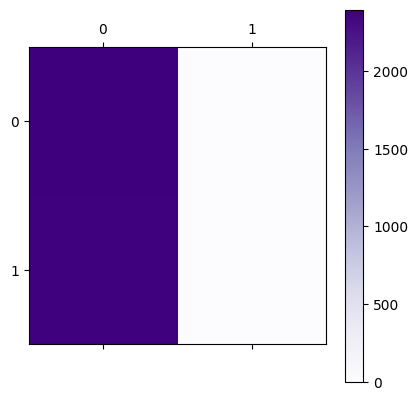

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
cm1=confusion_matrix(y_test1,y_pred1)
plt.matshow(cm1,cmap=plt.cm.Purples)
plt.colorbar()
print(cm1)

In [31]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2397
           1       0.00      0.00      0.00      2386

    accuracy                           0.50      4783
   macro avg       0.25      0.50      0.33      4783
weighted avg       0.25      0.50      0.33      4783



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
